# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Links:
python library: https://pypi.python.org/pypi/citipy

Weather api: https://openweathermap.org/api

In [51]:
import random
from citipy import citipy
import requests
import json
from pprint import pprint
from api_keys import weather_api_key
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress

## Generate Cities List

In [52]:
# Generate cities lists
cities = []

# Loop to create randon latitudes and longitudes
for i in range(0,1500):
    lat = round(random.uniform(-90,90),2)
    lng = round(random.uniform(-180,180),2)
    # Use citipy to find the nearest city to the (lat, lng)
    city = citipy.nearest_city(lat, lng)
    # Use citipy to return the name of the neareat city
    city_name = city.city_name
    # Append city name to city list
    cities.append(city_name)
# Remove any duplicates in the cities list
cities = list(dict.fromkeys(cities))
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
# Build base URL for API call
weather_response = []
base_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=imperial" + "&q="
counter = 0

#create lists empty lists to hold desired data
city_name = []
latitude = []
longitude = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
date = []
country = []

# API call loop
for citi in cities:
    query_url = base_url + citi
    try:
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record | {citi}")
    except:
        print(f"City not found | {citi}")
print("** API call complete **")

Processing Record | qaanaaq
Processing Record | jacqueville
Processing Record | ushuaia
Processing Record | rikitea
Processing Record | mataura
City not found | illoqqortoormiut
Processing Record | butaritari
Processing Record | road town
Processing Record | chokurdakh
Processing Record | srednekolymsk
Processing Record | horsham
Processing Record | east london
Processing Record | punta arenas
Processing Record | leningradskiy
Processing Record | noumea
Processing Record | port elizabeth
Processing Record | gopalpur
Processing Record | conceicao do mato dentro
Processing Record | tiksi
Processing Record | codrington
Processing Record | abalak
Processing Record | tuatapere
Processing Record | yulara
Processing Record | coihaique
Processing Record | busselton
Processing Record | jamestown
Processing Record | kavieng
Processing Record | honningsvag
Processing Record | la ronge
Processing Record | cape town
Processing Record | hudiksvall
City not found | malwan
City not found | labutta
Pro

Processing Record | kudahuvadhoo
Processing Record | vanimo
Processing Record | karratha
Processing Record | dunedin
Processing Record | hay river
Processing Record | kurchum
Processing Record | tornio
Processing Record | henties bay
Processing Record | lesnyye polyany
Processing Record | kalaleh
Processing Record | samarai
Processing Record | puerto madryn
Processing Record | iquique
City not found | nguiu
Processing Record | champasak
Processing Record | vestmannaeyjar
Processing Record | sonamukhi
Processing Record | mount gambier
Processing Record | darhan
Processing Record | esmeraldas
Processing Record | santa rosa
Processing Record | kamennomostskiy
Processing Record | baikunthpur
City not found | tarudant
Processing Record | ilo
Processing Record | alofi
City not found | tasbuget
Processing Record | moroni
Processing Record | ola
City not found | tumannyy
City not found | haibowan
City not found | formoso do araguaia
City not found | karmana
Processing Record | sainte-rose
Proc

Processing Record | gazimurskiy zavod
Processing Record | moose factory
Processing Record | oussouye
Processing Record | machilipatnam
Processing Record | kamina
Processing Record | aljezur
Processing Record | qaqortoq
Processing Record | puerto escondido
Processing Record | chimbarongo
Processing Record | imeni poliny osipenko
Processing Record | ishigaki
Processing Record | poronaysk
Processing Record | port-gentil
Processing Record | yuancheng
City not found | alotau
Processing Record | boa vista
Processing Record | svay rieng
Processing Record | nabire
Processing Record | denham springs
Processing Record | hofn
Processing Record | banjarmasin
Processing Record | kalasin
Processing Record | ornskoldsvik
Processing Record | harper
Processing Record | changtu
Processing Record | sola
Processing Record | dahuk
Processing Record | rundu
Processing Record | sabang
Processing Record | pimenta bueno
Processing Record | plaridel
Processing Record | machali
Processing Record | christchurch
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
# Create dictionary of results
weather_data_dict = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
#Create dataframe from dictionary
weather_data = pd.DataFrame(weather_data_dict)
#Set index column name
weather_data.index.names = ['City_ID']
# Export dataframe to csv
file_path = os.path.join("..","output_data","cities.csv")
weather_data.to_csv(file_path)
# Display DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Qaanaaq,77.48,-69.36,21.18,84,52,9.28,GL,1600368313
1,Jacqueville,5.21,-4.41,78.80,83,20,8.05,CI,1600368673
2,Ushuaia,-54.80,-68.30,37.40,59,40,26.40,AR,1600368256
3,Rikitea,-23.12,-134.97,71.85,82,99,23.60,PF,1600368267
4,Mataura,-46.19,168.86,39.00,79,86,11.01,NZ,1600368262


In [55]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.794018,20.882947,66.652000,69.692982,49.870175,8.814474,1.600368e+09
std,33.340686,90.617107,15.983635,21.084451,41.297293,12.098228,2.112534e+02
min,-54.800000,-179.170000,21.180000,3.000000,0.000000,0.160000,1.600368e+09
25%,-6.977500,-60.797500,53.600000,58.000000,1.000000,3.910000,1.600368e+09
50%,24.920000,28.260000,70.400000,75.000000,47.500000,6.930000,1.600368e+09
75%,49.422500,101.887500,79.000000,86.000000,95.000000,11.410000,1.600369e+09
max,78.220000,178.420000,103.080000,100.000000,100.000000,260.160000,1.600369e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [56]:
humidity_gr_than_100 = weather_data[weather_data["Humidity"] > 100]
len(humidity_gr_than_100)
# Conclusion: skipping this step as there are no cities with humidity greater than 100%

0

In [57]:
#  Get the indices of cities that have humidity over 100%.


In [58]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

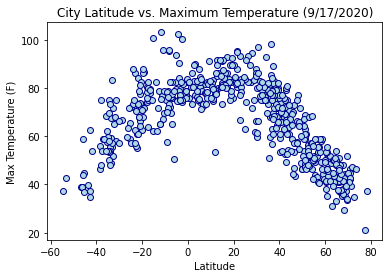

In [59]:
x_data = weather_data["Lat"]
y_data = weather_data["Max Temp"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Maximum Temperature ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
output_path_fig1 = os.path.join("..","output_data","fig1.png")
plt.savefig(output_path_fig1)

## Latitude vs. Humidity Plot

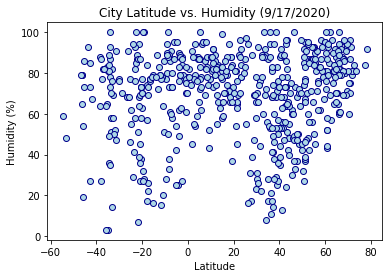

In [60]:
x_data = weather_data["Lat"]
y_data = weather_data["Humidity"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Humidity ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
output_path_fig2 = os.path.join("..","output_data","fig2.png")
plt.savefig(output_path_fig2)

## Latitude vs. Cloudiness Plot

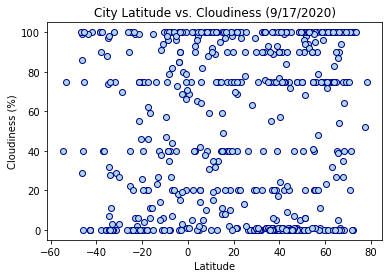

In [61]:
x_data = weather_data["Lat"]
y_data = weather_data["Cloudiness"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Cloudiness ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
output_path_fig3 = os.path.join("..","output_data","fig3.png")
plt.savefig(output_path_fig3)

## Latitude vs. Wind Speed Plot

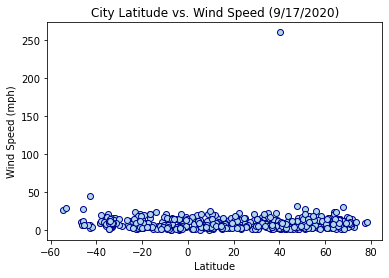

In [62]:
x_data = weather_data["Lat"]
y_data = weather_data["Wind Speed"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Wind Speed ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
output_path_fig4 = os.path.join("..","output_data","fig4.png")
plt.savefig(output_path_fig4)

## Linear Regression

In [63]:
# Split dataset into Hemispheres: Nothern = lat > 0, southern = lat < 0
northern_hemisphere = weather_data[weather_data["Lat"] > 0]
southern_hemisphere = weather_data[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.8428755256216633


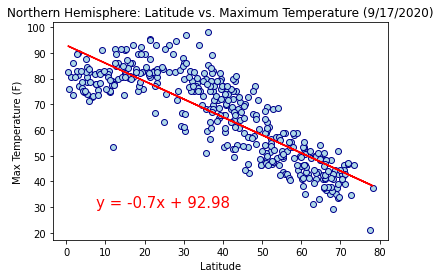

In [77]:
x_data = northern_hemisphere["Lat"]
y_data = northern_hemisphere["Max Temp"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Maximum Temperature ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
output_path_fig5 = os.path.join("..","output_data","fig5.png")
plt.savefig(output_path_fig5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.7384752123283461


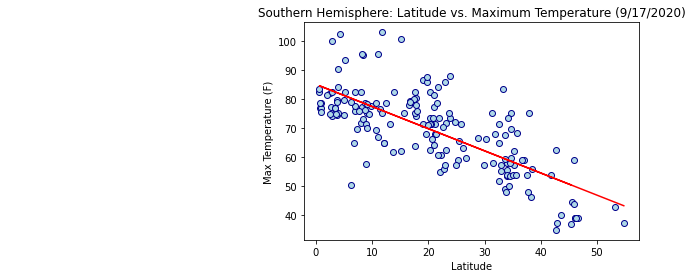

In [78]:
x_data = southern_hemisphere["Lat"]*-1
y_data = southern_hemisphere["Max Temp"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Southern Hemisphere: Latitude vs. Maximum Temperature ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (-55, 90), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig6 = os.path.join("..","output_data","fig6.png")
plt.savefig(output_path_fig6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.03839949495295286


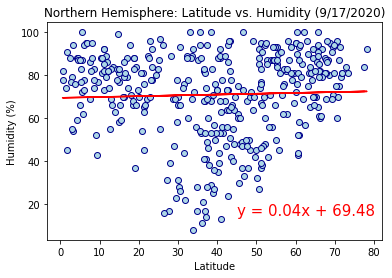

In [79]:
x_data = northern_hemisphere["Lat"]
y_data = northern_hemisphere["Humidity"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Humidity ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (45, 15), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig7 = os.path.join("..","output_data","fig7.png")
plt.savefig(output_path_fig7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = -0.09128865800725214


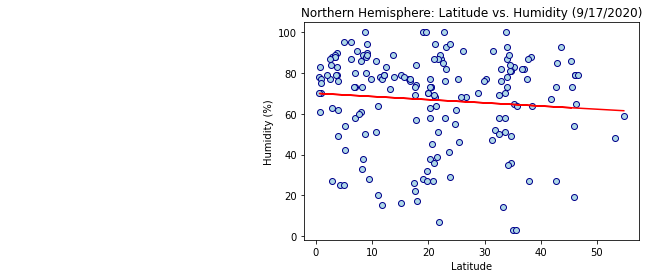

In [80]:
x_data = southern_hemisphere["Lat"]*-1
y_data = southern_hemisphere["Humidity"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Humidity ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (-55, 10), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig8 = os.path.join("..","output_data","fig8.png")
plt.savefig(output_path_fig8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.0866683517157197


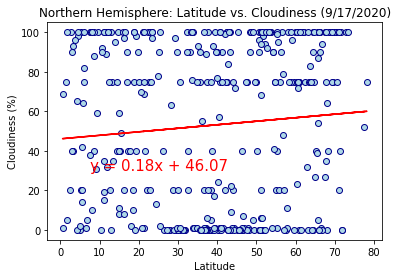

In [81]:
x_data = northern_hemisphere["Lat"]
y_data = northern_hemisphere["Cloudiness"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Cloudiness ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig9 = os.path.join("..","output_data","fig9.png")
plt.savefig(output_path_fig9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = -0.13797870455053132


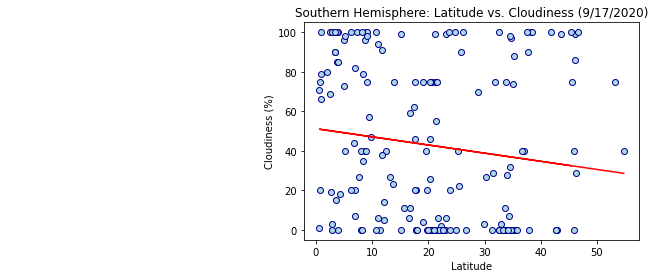

In [82]:
x_data = southern_hemisphere["Lat"]*-1
y_data = southern_hemisphere["Cloudiness"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Southern Hemisphere: Latitude vs. Cloudiness ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (-55, 50), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig10 = os.path.join("..","output_data","fig10.png")
plt.savefig(output_path_fig10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.03279665624700768


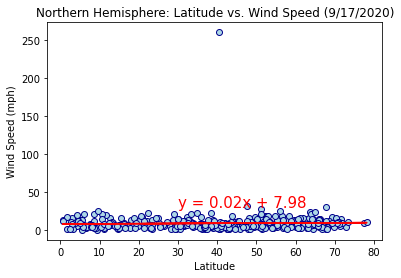

In [83]:
x_data = northern_hemisphere["Lat"]
y_data = northern_hemisphere["Wind Speed"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Wind Speed ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (30, 30), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig11 = os.path.join("..","output_data","fig11.png")
plt.savefig(output_path_fig11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.27376935702110117


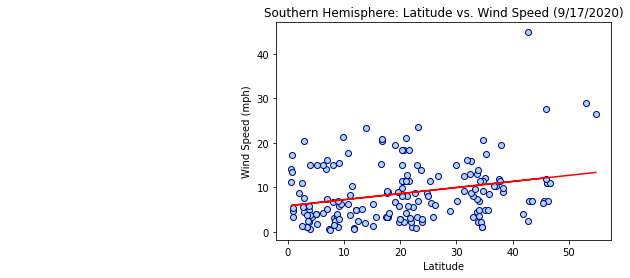

In [84]:
x_data = southern_hemisphere["Lat"]*-1
y_data = southern_hemisphere["Wind Speed"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Southern Hemisphere: Latitude vs. Wind Speed ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (-50, 35), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig12 = os.path.join("..","output_data","fig12.png")
plt.savefig(output_path_fig12)